## find_remaining_variables.ipynb

In this notebook, we find various variables for politicians and non-politicians. We first extract all election- and election-history related data. For the non-politicians, the names come directly from the elections data. Hence, we do not have to string match. For the politicians, we have to match the names of the politicians to the names in the elections dataset. 

Secondly, we extract demographic and district data 

In [52]:
import pandas as pd
import numpy as np

from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns

from rdrobust import rdrobust,rdbwselect,rdplot

In [14]:
# Read the data
data = pd.read_csv("../Data/analysis/unmatched_sample_analysis.csv", dtype={'b1-nummer':str}).iloc[:,1:]
# (or some other dataset)

## Explore the balance of observations

We take the data frame as a whole, but also as an observation for each observation in the control group

In [30]:
# All non-NA obs.
print("All observations", data[-data['Vermogen_deflated'].isnull()].shape)


# Control group
print("Control group:", 
      data[(-data['Vermogen_deflated'].isnull()) & (data['b1-nummer'].isnull())].shape
     )


# Treatment group
print("Treatment group:", 
      data[(-data['Vermogen_deflated'].isnull()) & (-data['b1-nummer'].isnull())].shape
     )

All observations (577, 8)
Control group: (236, 8)
Treatment group: (341, 8)


## Variable pick up function

We write a function that picks up all required variables, first for all observations, then for politicians and then for non-politicians. 

In [ ]:
# Election and election history data
## Some datasets which I need
electoral_data = pd.read_csv("../Data/elections/election_results_details.csv").iloc[:,1:]
electoral_data.iloc[:,[2,7,8,9,10,11,12,13]] = electoral_data.iloc[:,[2,7,8,9,10,11,12,13]].apply(lambda x: pd.to_numeric(x, errors='coerce'))
electoral_data['Verkiezingdatum'] = electoral_data['Verkiezingdatum'].apply(lambda x: pd.Timestamp(x))

## Seats data


In [45]:
def get_variables(df):
    
    for i in range(len(data)):
    # For everyone:
    ## How many times did you participate in elections before this time?
        electoral_data_before = electoral_data[electoral_data['Verkiezingdatum'] < pd.Timestamp(data.iloc[i]['Verkiezingdatum'])]
        before = electoral_data_before[electoral_data_before['Naam'].str.contains(data.iloc[i]['Naam'])].shape[0]
    
    ## How many times afterwards?
        electoral_data_after = electoral_data[electoral_data['Verkiezingdatum'] > pd.Timestamp(data.iloc[i]['Verkiezingdatum'])]
        after = electoral_data_after[electoral_data_after['Naam'].str.contains(data.iloc[i]['Naam'])].shape[0]
    
    ## How old were you during this election?
    
    ## Did you have a party?
    
    ## How many absolute votes?
    
    ## What district?
    

b1-nummer                   01100
Naam                 R. de Sitter
District               Winschoten
Verkiezingdatum        30/11/1848
Vermogen                      NaN
margin                   0.071839
Sterfdatum             24-02-1869
Vermogen_deflated             NaN
Name: 0, dtype: object
b1-nummer                    01527
Naam                 R. Westerhoff
District                Appingedam
Verkiezingdatum         27/12/1848
Vermogen                       NaN
margin                    0.136499
Sterfdatum              25-03-1874
Vermogen_deflated              NaN
Name: 1, dtype: object
b1-nummer                 00955
Naam                 J.T. Homan
District                  Assen
Verkiezingdatum      30/11/1848
Vermogen                    NaN
margin                 0.087193
Sterfdatum           29-03-1852
Vermogen_deflated           NaN
Name: 2, dtype: object
b1-nummer                    01100
Naam                 G. de Serière
District                 Hoogeveen
Verkiezingdatum   

Name: 253, dtype: object
b1-nummer                               00138
Naam                 P. Blussé van Oud-Alblas
District                            Dordrecht
Verkiezingdatum                    27/08/1850
Vermogen                            256112.74
margin                                0.03143
Sterfdatum                         19-05-1887
Vermogen_deflated               243496.348914
Name: 254, dtype: object
b1-nummer                    01074
Naam                 G.A. de Raadt
District                 Dordrecht
Verkiezingdatum         22/06/1852
Vermogen                  685978.4
margin                    0.121355
Sterfdatum              31-12-1883
Vermogen_deflated    497222.700289
Name: 255, dtype: object
b1-nummer                        01041
Naam                 J.D. van der Poel
District                     Dordrecht
Verkiezingdatum             10/06/1856
Vermogen                           NaN
margin                        0.045054
Sterfdatum                  08-04-1898
Verm

Name: 479, dtype: object
b1-nummer                         01604
Naam                 G.L. van der Zwaag
District               Weststellingwerf
Verkiezingdatum              14/06/1901
Vermogen                            NaN
margin                         0.016178
Sterfdatum                   22-04-1923
Vermogen_deflated                   NaN
Name: 480, dtype: object
b1-nummer                      00861
Naam                 Æ. van Mackay 2
District                      Kampen
Verkiezingdatum           14/06/1901
Vermogen                         NaN
margin                      0.179588
Sterfdatum                06-03-1876
Vermogen_deflated                NaN
Name: 481, dtype: object
b1-nummer                   00175
Naam                       D. Bos
District               Winschoten
Verkiezingdatum        14/06/1901
Vermogen                 40350.64
margin                   0.015452
Sterfdatum             06-05-1916
Vermogen_deflated    29977.851678
Name: 482, dtype: object
b1-nummer   

Name: 713, dtype: object
b1-nummer                                 NaN
Naam                 mr. E.J.I. van Sonsbeeck
District                               Almelo
Verkiezingdatum                    06/05/1884
Vermogen                              6491.81
margin                              -0.022527
Sterfdatum                         28/12/1890
Vermogen_deflated                 6161.898344
Name: 714, dtype: object
b1-nummer                                 NaN
Naam                 mr. E.J.I. van Sonsbeeck
District                               Almelo
Verkiezingdatum                    20/05/1884
Vermogen                              6491.81
margin                              -0.018166
Sterfdatum                         28/12/1890
Vermogen_deflated                 6161.898344
Name: 715, dtype: object
b1-nummer                      NaN
Naam                  A.H. Jannink
District                    Almelo
Verkiezingdatum         15/06/1886
Vermogen                 231030.19
margin        

Name: 978, dtype: object
b1-nummer                                 NaN
Naam                 R.P.J. Tutein Nolthenius
District                              Zutphen
Verkiezingdatum                    01/08/1905
Vermogen                                  NaN
margin                              -0.029433
Sterfdatum                         30/11/1939
Vermogen_deflated                         NaN
Name: 979, dtype: object
b1-nummer                                 NaN
Naam                 R.P.J. Tutein Nolthenius
District                              Zutphen
Verkiezingdatum                    08/08/1905
Vermogen                                  NaN
margin                              -0.128658
Sterfdatum                         30/11/1939
Vermogen_deflated                         NaN
Name: 980, dtype: object
b1-nummer                      NaN
Naam                 J.P. van Term
District               Rotterdam V
Verkiezingdatum         07/09/1905
Vermogen                       NaN
margin        

Name: 1220, dtype: object
b1-nummer                    NaN
Naam                    D. Schut
District             Amsterdam I
Verkiezingdatum       16/06/1905
Vermogen                     NaN
margin                 -0.226132
Sterfdatum                   NaN
Vermogen_deflated            NaN
Name: 1221, dtype: object
b1-nummer                                             NaN
Naam                 mr. J. baron van Aulnis de Bourouill
District                                        Groningen
Verkiezingdatum                                16/06/1905
Vermogen                                              NaN
margin                                          -0.268848
Sterfdatum                                            NaN
Vermogen_deflated                                     NaN
Name: 1222, dtype: object
b1-nummer                      NaN
Naam                 H.J. de Groot
District              Den Haag III
Verkiezingdatum         11/06/1909
Vermogen                       NaN
margin             

/home/bas/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log


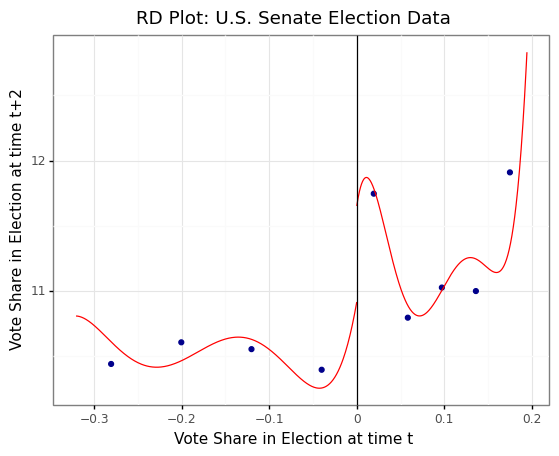


Call: rdplot
Number of Observations:                   547
Kernel:                               Uniform
Polynomial Order Est. (p):                  5

                                Left      Right
------------------------------------------------
Number of Observations           231        316
Number of Effective Obs          231        316
Bandwith poly. fit (h)         0.321      0.194
Number of bins scale               1          1
Bins Selected                      4          5
Average Bin Length              0.08      0.039
Median Bin Length               0.08      0.039
IMSE-optimal bins                4.0        5.0
Mimicking Variance bins         19.0       16.0

Relative to IMSE-optimal:
Implied scale                    1.0        1.0
WIMSE variance weight            0.5        0.5
WIMSE bias weight                0.5        0.5


In [65]:
rdplot(y=np.log(1+data['Vermogen_deflated']), x=data['margin'], binselect="es", p=5,
         title="RD Plot: U.S. Senate Election Data", 
         y_label="Vote Share in Election at time t+2",
         x_label="Vote Share in Election at time t")
